# Week 6 Algorithmic Toolbox: Dynamic Programming II



## **2. Partitioning Souvenirs**
You and two of your friends have just returned back home after visiting various countries. Now you would
like to evenly split all the souvenirs that all three of you bought.
### **Problem Description**


**Input Format.** The first line contains an integer 𝑛. The second line contains integers 𝑣1, 𝑣2, . . . , 𝑣𝑛 separated
by spaces

**Constraints.** 1 ≤ 𝑛 ≤ 20, 1 ≤ 𝑣𝑖 ≤ 30 for all 𝑖.

**Output Format.** Output 1, if it possible to partition 𝑣1, 𝑣2, . . . , 𝑣𝑛 into three subsets with equal sums, and
0 otherwise.
### **Sample 1**
Input:

4

3 3 3 3

Output: 

0
### **Sample 2**
Input:

1

40

Output: 

0
### **Sample 3**
Input:

11

17 59 34 57 17 23 67 1 18 2 59

Output: 

1
### **Sample 4**
Input:

13

1 2 3 4 5 5 7 7 8 10 12 19 25

Output: 

1

### **Code**

In [17]:
%%writefile partition.py
import numpy


def partitions(suma, n, items):

    count = 0 
    value = numpy.zeros((suma+1, n+1))
    for i in range(1, suma+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]


            if items[j-1]<=i:
                temp = value[i-items[j-1]][j-1] + items[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == suma: count += 1

    if count < 3: print('0')
    else: print('1')

if __name__ == '__main__':
    n =int(input())
    item_weights = [int(i) for i in input().split()]
    total_weight = sum(item_weights)
    if n<3: 
        print('0')
    elif total_weight%3 != 0: 
        print('0')
    else:
        partitions(total_weight//3, n, item_weights)

Writing partition.py


### **Sample 1** 

In [18]:
!python partition.py


4
3 3 3 3
0


### **Sample 2** 

In [19]:
!python partition.py


1
40
0


### **Sample 3** 

In [20]:
!python partition.py


11
17 59 34 57 17 23 67 1 18 2 59
1


### **Sample 4** 

In [21]:
!python partition.py


13
1 2 3 4 5 5 7 7 8 10 12 19 25
1


## **3. Maximum Value of an Arithmetic Expression**
In this problem, your goal is to add parentheses to a given arithmetic
expression to maximize its value. max(5 − 8 + 7 × 4 − 8 + 9) =?
### **Problem Description**
**Task.**  Find the maximum value of an arithmetic expression by specifying the order of applying its arithmetic
operations using additional parentheses.

**Input Format.** Find the maximum value of an arithmetic expression by specifying the order of applying its arithmetic
operations using additional parentheses.

**Constraints.** 0 ≤ 𝑛 ≤ 14 (hence the string contains at most 29 symbols).

**Output Format.** Output the maximum possible value of the given arithmetic expression among different
orders of applying arithmetic operations.
### **Sample 1**
Input:

1+5


Output: 

6
### **Sample 2**
Input:

5-8+7*4-8+9


Output: 

200

### **Code**

In [22]:
%%writefile parentesis.py
import math

def evalt(a, b, op):
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    elif op == '*':
        return a * b
    else:
        assert False


def defineVectors(maxg,ming,i,j,operators):
    minTot=math.inf
    maxTot=-math.inf
    for val in range(i,j):
        op1=evalt(maxg[i][val],maxg[val+1][j],operators[val])
        op2=evalt(maxg[i][val],ming[val+1][j],operators[val])
        op3=evalt(ming[i][val],maxg[val+1][j],operators[val])
        op4=evalt(ming[i][val],ming[val+1][j],operators[val])
        minTot=min(minTot,op1,op2,op3,op4)
        maxTot=max(maxTot,op1,op2,op3,op4)

    return minTot, maxTot


def get_maximum_value(dataset):
    nums=[]
    operators=[]
    for i in dataset:
        if i in["+","-","*"]:
            operators.append(i)
        else:
            nums.append(int(i))
    
    n=len(nums)
    ming = [[None for x in range(n)] for x in range(n)]
    maxg = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        ming[i][i]=nums[i]
        maxg[i][i]=nums[i]




    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            ming [i][j], maxg[i][j] = defineVectors(maxg, ming, i, j, operators)
   
    return maxg[0][n-1]


if __name__ == "__main__":
    print(get_maximum_value(input()))

Writing parentesis.py


### **Sample 1** 

In [23]:
!python parentesis.py


1+5
6


### **Sample 2** 

In [25]:
!python parentesis.py


5-8+7*4-8+9
200


# **Coursera Submition**

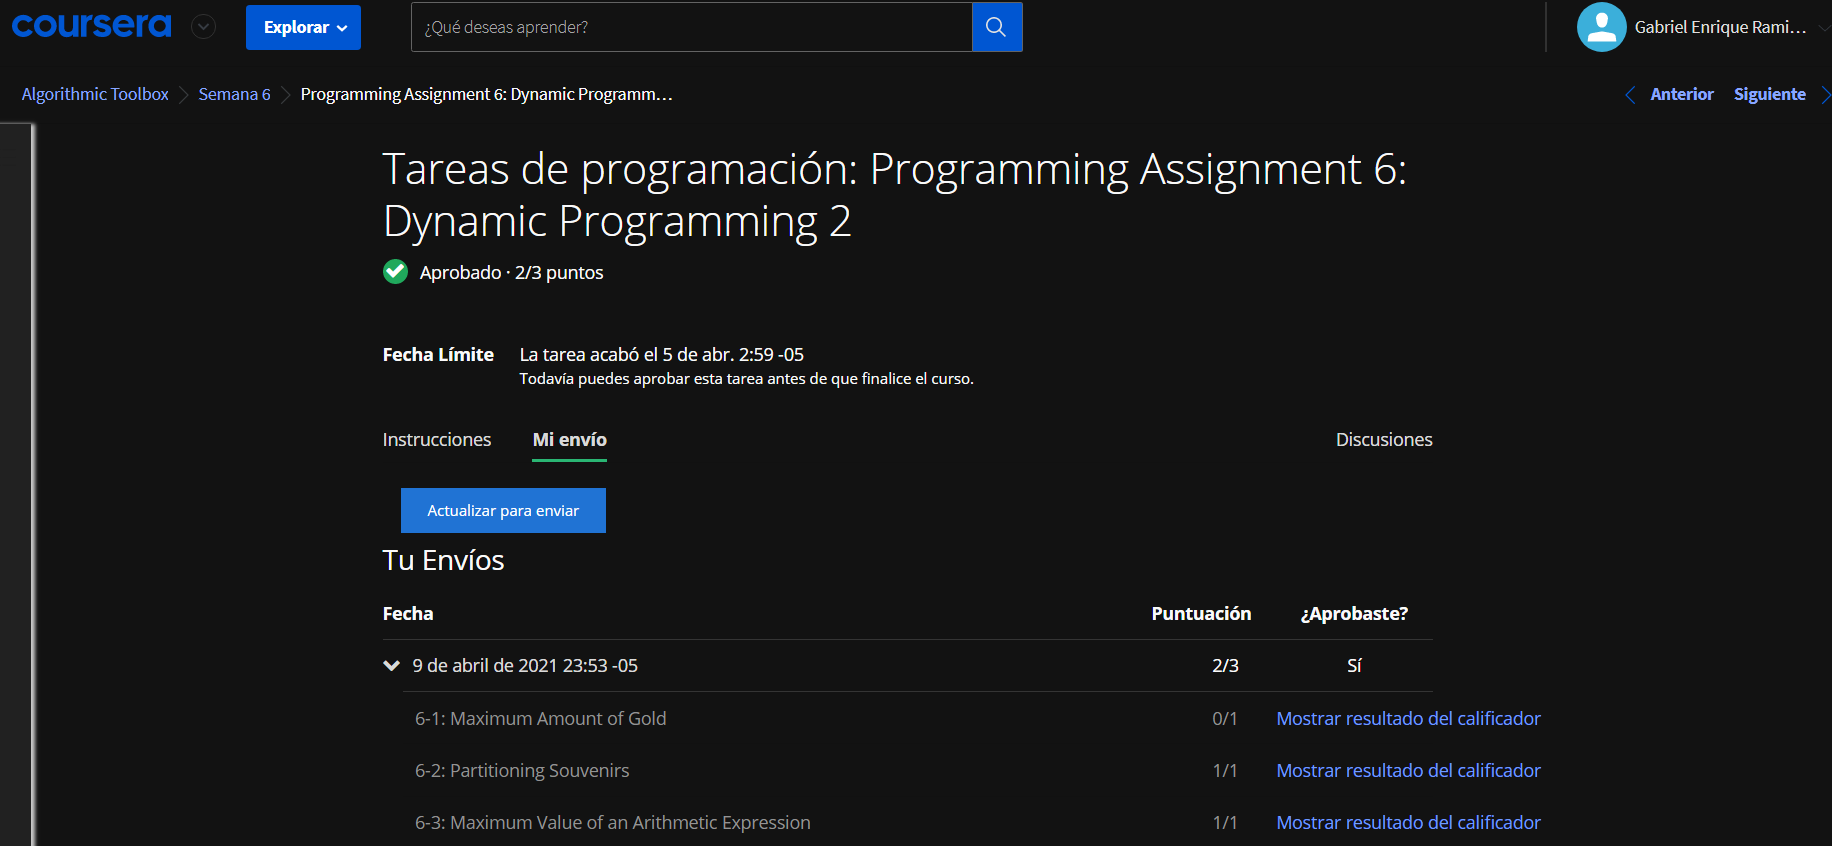